<a href="https://colab.research.google.com/github/18CSE178/DMDW/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path="https://raw.githubusercontent.com/18CSE178/DMDW/main/heart_failure_clinical_records_dataset.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(path)

In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df1=df[['anaemia','diabetes','ejection_fraction']]

In [6]:
df1.head()

,anaemia,diabetes,ejection_fraction
0,0,0,20
1,0,0,38
2,0,0,20
3,1,0,20
4,1,1,20


In [11]:
n=np.array(df1[['anaemia','diabetes']])
n=n.reshape(-1,2)
n.shape


(299, 2)

In [21]:
nominal=df[['ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium']]
nominal=nominal.replace('20','22')
nominal=(nominal.astype('category'))



In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['ejection_fraction']=lb.fit_transform(nominal['ejection_fraction'])
nominal['high_blood_pressure']=lb.fit_transform(nominal['high_blood_pressure'])
nominal['serum_creatinine']=lb.fit_transform(nominal['serum_creatinine'])
nominal['serum_sodium']=lb.fit_transform(nominal['serum_sodium'])


In [23]:
nominal.head()


,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium
0,3,1,17,9
1,7,0,7,15
2,3,0,10,8
3,3,0,17,16
4,3,0,24,1


In [24]:
nominal1=np.array(nominal)
nominal1.reshape(-1,2)
nominal2=np.array(nominal)
nominal2.reshape(-1,2)


array([[ 3,  1],
       [17,  9],
       [ 7,  0],
       ...,
       [11, 19],
       [ 9,  0],
       [13, 15]])

In [25]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nominal1,nominal2)
print(dist_matrix)


[[ 0.         12.36931688  7.14142843 ... 17.74823935 12.36931688
   9.43398113]
 [12.36931688  0.          8.60232527 ...  6.164414    5.65685425
   6.32455532]
 [ 7.14142843  8.60232527  0.         ... 14.07124728 11.74734012
   9.69535971]
 ...
 [17.74823935  6.164414   14.07124728 ...  0.          8.83176087
   9.69535971]
 [12.36931688  5.65685425 11.74734012 ...  8.83176087  0.
   4.89897949]
 [ 9.43398113  6.32455532  9.69535971 ...  9.69535971  4.89897949
   0.        ]]


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


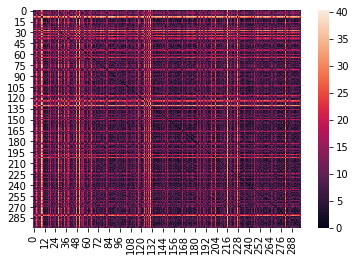

In [28]:
sns.heatmap(dist_matrix)
plt.show()
